# Install and load dependencies

In [1]:
%pip install pydeseq2
%pip install scanpy
%pip install sanbomics
%pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from functools import reduce
from sanbomics.plots import volcano
from bioinfokit import analys,visuz


import pandas as pd
import seaborn as sns
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

/Users/shahjess/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Run DeSeq2

In [3]:
merged = pd.read_csv('../data/raw/ogprimary_undiff_metadata.tsv', delimiter='\t')
merged.set_index(merged.columns[0], inplace=True)
merged.sort_index(inplace=True)
merged *= 100
merged = merged.astype(int)

In [4]:
labels = ['Primary'] * 5 + ['hiPSC'] * 6

metadata = pd.DataFrame(zip(merged.index, labels),
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')

In [5]:
dds = DeseqDataSet(counts=merged.iloc[0:11],
            metadata=metadata,
            design_factors="Condition")

In [6]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

/Users/shahjess/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shahjess/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shahjess/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shahjess/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shahjess/anaconda3/lib/python3.11/site-pac

In [7]:
stat_res = DeseqStats(dds, contrast = ('Condition','Primary','hiPSC'))

stat_res.summary()
res = stat_res.results_df


Running Wald tests...


Log2 fold change & Wald test p-value: Condition Primary vs hiPSC
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       597.951407        1.764927  1.070923  1.648043  0.099344  0.175676
NAT2        49.594378       -3.428577  1.282846 -2.672632  0.007526  0.019503
ADA        512.299541       -1.919445  1.330067 -1.443119  0.148987  0.242047
CDH2      7646.458534        2.310623  0.581073  3.976477  0.000070  0.000292
AKT3       824.609763       -1.896351  1.164070 -1.629069  0.103298  0.181127
...               ...             ...       ...       ...       ...       ...
PTBP3     6501.382642       -1.761765  0.387884 -4.541987  0.000006  0.000029
KCNE2       21.737960       -1.708339  1.409491 -1.212025  0.225503  0.333811
DGCR2     1554.636168       -1.129729  0.438172 -2.578275  0.009929  0.024847
CASP8AP2  1352.900659        0.281156  0.329942  0.852136  0.394139  0.509599
SCO2       418.453718        2.972281  2.393358  1.241887  0.214278  0.321683

... done in 0.48 seconds.



# Heat Map

In [8]:
import sys
sys.setrecursionlimit(10000)  # Set a higher recursion limit (adjust the value as needed)

In [9]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds_res = dds[:, res.index]

pattern_repetitions = {'Primary CM': 5, 'hiPSC': 6}
col_labels = [f'{pattern} {i}' for pattern, repetitions in pattern_repetitions.items() for i in range(1, repetitions + 1)]

grapher_res = pd.DataFrame(dds_res.layers['log1p'].T,
                       index=dds_res.var_names, columns=col_labels)

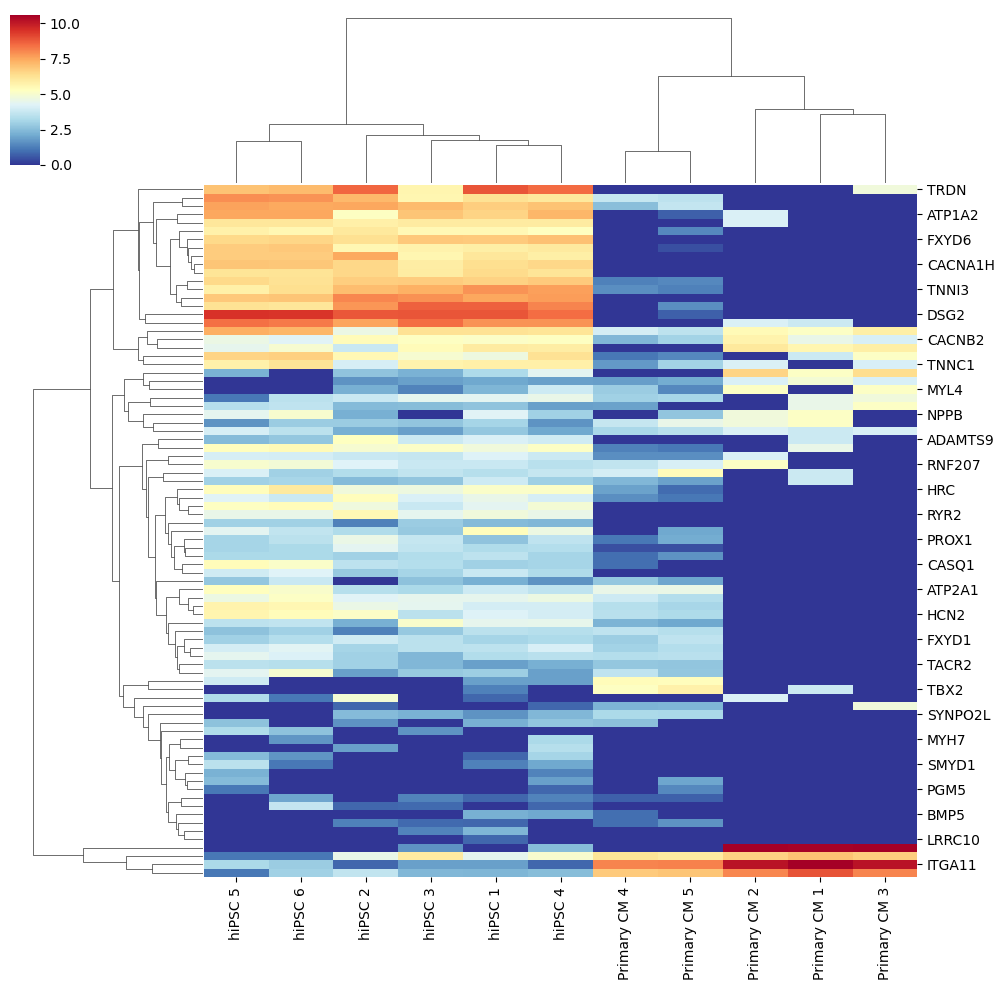

In [11]:
cardiac_genes = pd.read_csv('../data/raw/cardiac_genes.csv', delimiter='\t')
subset_grapher_res = grapher_res.loc[cardiac_genes['Gene']]

sns.clustermap(subset_grapher_res, cmap='RdYlBu_r',cbar_pos=(0, 0.83, .03, .15))
plt.savefig('../figures/Fig S3b Original Primary vs hiPSC Cardiac Heatmap')